<a href="https://colab.research.google.com/github/SJKIM2253/Statistics_with_Python/blob/master/190718_%EC%A2%85%ED%95%A9%EC%8B%A4%EC%8A%B5_%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80_%ED%9D%91%EC%9D%B8%EC%B0%A8%EB%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   데이터 정제

(1) 통계량 확인, 결측치/ 이상치 확인 >> 처리하기(이상치 대체)

(2)  



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mp

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse  # 추정의 표준오차
%matplotlib inline

from sklearn.tree import export_graphviz
import graphviz

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV   # cross validation(구버전)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [68]:
df_raw = pd.read_csv("/content/drive/My Drive/Colab Notebooks/boston_corrected_D_low.csv", engine="python")
df_raw.head()

,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,B2,B3,W,PRICE/LSTAT,W/10,BB,WW,DISCRIM
0,Brookline,45,4011,-71.0850,42.1925,50.0,50.0,0.57834,20.0,3.97,0,0.575,8.297,67.0,2.4216,5,264,13.0,7.44,1.250113,12.501129,98.749887,6.720430,7.498871,0.013790,0.013409,0.000380
1,Cambridge,28,3545,-71.0770,42.2305,50.0,50.0,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,3.70,1.237701,12.377006,98.762299,13.513514,7.622994,0.027453,0.026967,0.000486
2,Newton,40,3736,-71.1012,42.1975,50.0,50.0,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,4.63,1.248061,12.480615,98.751939,10.799136,7.519385,0.022123,0.021548,0.000575
3,Brookline,45,4001,-71.0679,42.2073,50.0,50.0,0.61154,20.0,3.97,0,0.647,8.704,86.9,1.8010,5,264,13.0,5.12,1.254260,12.542596,98.745740,9.765625,7.457404,0.020105,0.019485,0.000620
4,Belmont,30,3578,-71.1115,42.2442,50.0,50.0,0.05602,0.0,2.46,0,0.488,7.831,53.6,3.1992,3,193,17.8,4.45,1.256602,12.566019,98.743398,11.235955,7.433981,0.023175,0.022418,0.000757




# 1.   데이터 정제

(1) 통계량 확인, 결측치/ 이상치 확인 >> 처리하기(이상치 대체)

(2)  



In [0]:
## 컬럼별 type 확인 및 결측치 확인
# df_raw.info()
# df_raw.isnull().sum()

결측치는 없는 것으로 확인됨

In [0]:
import seaborn as sns
df_raw = df_raw.drop(["TOWN","TOWN#","TRACT","LON","LAT","MEDV","CMEDV","LSTAT","B2","B3","W","W/10"], axis = 1)
sns.pairplot(df_raw)

In [0]:
df_raw.corr().round(3)

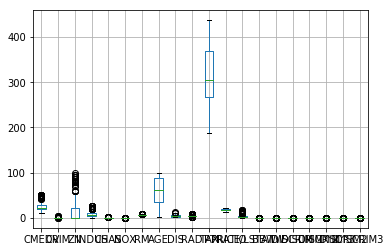

In [61]:
df_raw.boxplot()

In [66]:
df_raw_x = df_raw.drop("PRICE/LSTAT", axis=1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variable,VIF
5,CHAS,1.095000e+00
10,RAD,1.243000e+00
11,TAX,1.659000e+00
12,PTRATIO,1.917000e+00
3,ZN,2.462000e+00
4,INDUS,2.585000e+00
8,AGE,2.724000e+00
2,CRIM,3.290000e+00
9,DIS,3.922000e+00
6,NOX,5.033000e+00


In [62]:
import seaborn as sns
df_raw["DISCRIM2"]=df_raw.DISCRIM * df_raw.DISCRIM
df_raw["DISCRIM3"]=df_raw.DISCRIM * df_raw.DISCRIM * df_raw.DISCRIM
# df_raw_x = df_raw[["DISCRIM","DISCRIM2","DISCRIM3"]]
df_raw

KeyError: ignored

In [53]:
reg_model = smf.ols(formula="MEDV~ DISCRIM + DISCRIM2 + DISCRIM3", data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     347.5
Date:                Sat, 20 Jul 2019   Prob (F-statistic):          8.84e-106
Time:                        07:34:47   Log-Likelihood:                -1028.7
No. Observations:                 363   AIC:                             2065.
Df Residuals:                     359   BIC:                             2081.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.8622      0.340     52.480      0.0

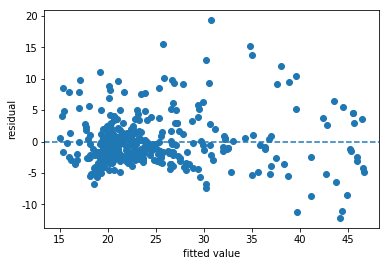

In [54]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0,linestyle="--")
mp.rcParams['axes.unicode_minus'] = False

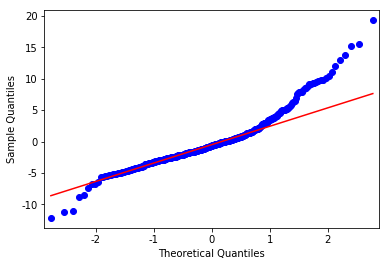

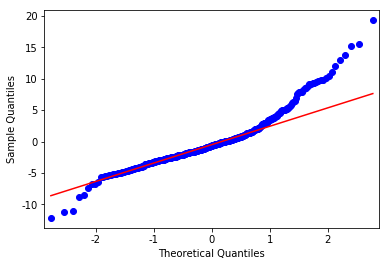

In [55]:
qqplot(reg_result.resid, line='q')

In [57]:
from sklearn import linear_model
df_raw_y = df_raw["MEDV"]
df_raw_x = df_raw[["DISCRIM","DISCRIM2","DISCRIM3"]]

clf = linear_model.Lasso(alpha=1.0)
result=clf.fit(df_raw_x,df_raw_y)

df_LASSO = pd.DataFrame()
df_LASSO["variable"]=df_raw_x.columns
df_LASSO["Coef"] = pd.DataFrame(result.coef_)
df_LASSO

,variable,Coef
0,DISCRIM,0.0
1,DISCRIM2,0.0
2,DISCRIM3,0.0


In [0]:
print(result.intercept_)

41.0569340895711
